In [31]:
import os
from fastai.vision.all import *
from fastai.data.all import *
from fastai.vision.widgets import *


In [3]:
torch.cuda.set_device(6)

In [8]:
path = '/home/alao/ml/models_data/985_syn_n_463_heal_sb'
len(os.listdir(path)), path

(2, '/home/alao/ml/models_data/985_syn_n_463_heal_sb')

In [9]:
fnames = get_image_files(path)
fnames

(#1448) [Path('/home/alao/ml/models_data/985_syn_n_463_heal_sb/985_syn_sb/cgls_362_sb_111.png'),Path('/home/alao/ml/models_data/985_syn_n_463_heal_sb/985_syn_sb/cgls_63_sb_111.png'),Path('/home/alao/ml/models_data/985_syn_n_463_heal_sb/985_syn_sb/cgls_14_sb_165.png'),Path('/home/alao/ml/models_data/985_syn_n_463_heal_sb/985_syn_sb/cgls_419_sb_459.png'),Path('/home/alao/ml/models_data/985_syn_n_463_heal_sb/985_syn_sb/cgls_155_sb_40.png'),Path('/home/alao/ml/models_data/985_syn_n_463_heal_sb/985_syn_sb/cgls_138_sb_373.png'),Path('/home/alao/ml/models_data/985_syn_n_463_heal_sb/985_syn_sb/cgls_126_sb_258.png'),Path('/home/alao/ml/models_data/985_syn_n_463_heal_sb/985_syn_sb/cgls_79_sb_101.png'),Path('/home/alao/ml/models_data/985_syn_n_463_heal_sb/985_syn_sb/cgls_416_sb_96.png'),Path('/home/alao/ml/models_data/985_syn_n_463_heal_sb/985_syn_sb/cgls_58_sb_111.png')...]

(256, 256)

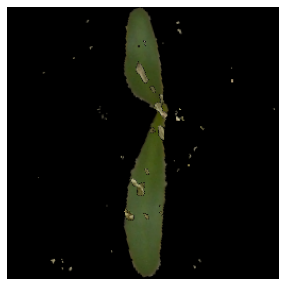

In [10]:
im = PILImage.create(fnames[800])
im.show()
im.size

# Build Datablocks and Train Model

In [11]:

plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    batch_tfms=aug_transforms())

In [12]:
dls = plants.dataloaders(path, bs=32)

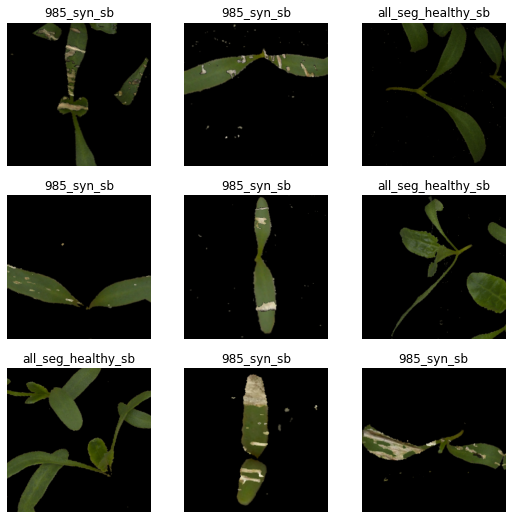

In [13]:
dls.show_batch()

# ResNet 34 Model 

In [27]:

learn_res34 = cnn_learner(dls, resnet34, metrics=(error_rate, accuracy))
learn_res34.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.607461,0.781421,0.243056,0.756944,00:04


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.251784,0.805125,0.222222,0.777778,00:05
1,0.169424,0.537847,0.083333,0.916667,00:05
2,0.111338,0.634038,0.090278,0.909722,00:05
3,0.095944,0.845286,0.125000,0.875000,00:05
4,0.108774,0.586308,0.069444,0.930556,00:05
5,0.067479,0.542036,0.076389,0.923611,00:05
6,0.046057,0.845258,0.131944,0.868056,00:05
7,0.032441,0.874788,0.125000,0.875000,00:05
8,0.038096,0.760016,0.090278,0.909722,00:05
9,0.024934,0.685086,0.069444,0.930556,00:05


In [28]:
learn_res34.export('resnet-34_985_syn.pkl')

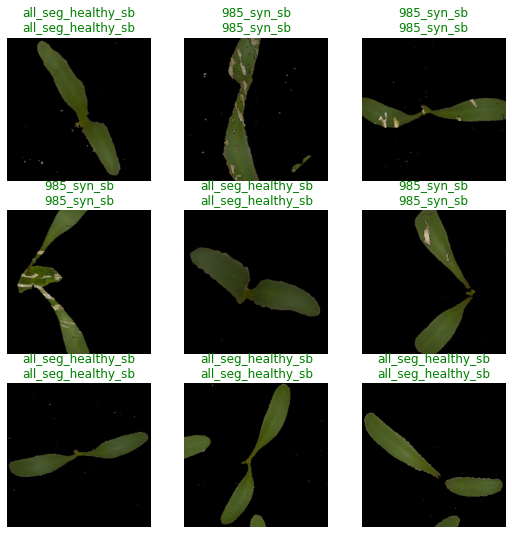

In [17]:
learn_res34.show_results()

# Evaluate Model

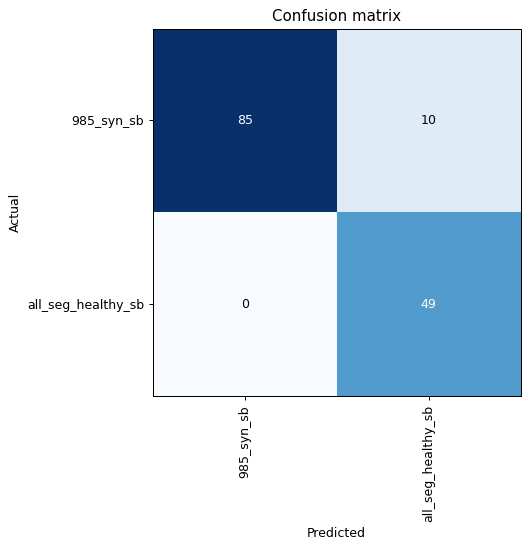

In [18]:

interp_res34 = ClassificationInterpretation.from_learner(learn_res34)
interp_res34.plot_confusion_matrix(dpi = 90,figsize = (6,6))

In [62]:
learn_res34.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

# AlexNet Architecture

In [20]:

learn_alex = cnn_learner(dls, alexnet, metrics=(error_rate, accuracy))
learn_alex.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.666243,0.406848,0.118056,0.881944,00:02


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.346191,0.538855,0.145833,0.854167,00:03
1,0.245659,0.660536,0.152778,0.847222,00:03
2,0.184027,0.565125,0.118056,0.881944,00:03
3,0.172452,0.263221,0.055556,0.944444,00:03
4,0.123798,0.792261,0.145833,0.854167,00:03
5,0.083016,0.709689,0.125000,0.875000,00:03
6,0.062885,0.521687,0.083333,0.916667,00:03
7,0.058711,0.634081,0.104167,0.895833,00:03
8,0.046845,0.509421,0.090278,0.909722,00:03
9,0.037075,0.537437,0.097222,0.902778,00:03


In [29]:
learn_alex.export('alexnet_985_syn.pkl')

# Evaluate Model

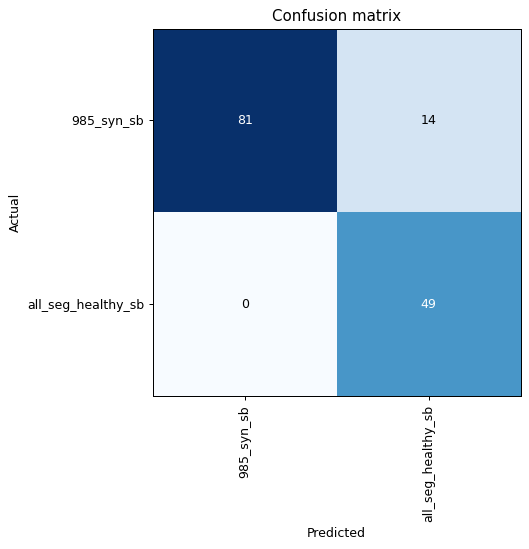

In [21]:

interp_alex = ClassificationInterpretation.from_learner(learn_alex)
interp_alex.plot_confusion_matrix(dpi = 90,figsize = (6,6))

In [22]:
learn_alex.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 63 x 63   
Conv2d                                    23296      True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 31 x 31   
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 192 x 31 x 31  
Conv2d                                    307392     True      
ReLU                                                           
____________________________________________________________________________
                     32 x 192 x 15 x 15  
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 384 x

# ResNet 152 Architecture

In [24]:

learn_res152 = cnn_learner(dls, resnet152, metrics=(error_rate, accuracy))
learn_res152.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.528365,2.258588,0.361111,0.638889,00:25


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.206566,1.258448,0.250000,0.750000,00:31
1,0.152987,0.940458,0.125000,0.875000,00:31
2,0.142237,0.617915,0.104167,0.895833,00:31
3,0.084825,1.298910,0.166667,0.833333,00:31
4,0.094414,1.494924,0.187500,0.812500,00:31
5,0.058049,1.448695,0.187500,0.812500,00:31
6,0.051646,0.430485,0.062500,0.937500,00:31
7,0.039606,0.340833,0.013889,0.986111,00:31
8,0.025893,0.356922,0.013889,0.986111,00:31
9,0.016733,0.365274,0.020833,0.979167,00:31


In [30]:
learn_res152.export('resnet-152_985_syn.pkl')

# Evaluate Model

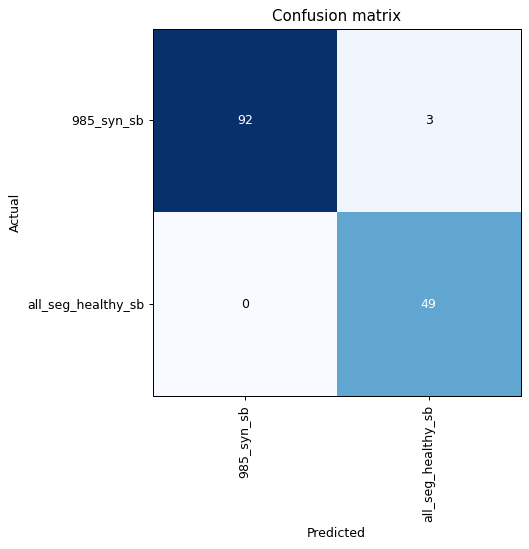

In [25]:

interp_res152 = ClassificationInterpretation.from_learner(learn_res152)
interp_res152.plot_confusion_matrix(dpi = 90,figsize = (6,6))

In [26]:
learn_res152.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     32 x 256 x 64 x 64  
Conv2d                                    16384      True      
BatchNorm2d                        